In [31]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Importando as bibliotecas do Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [36]:
# Importando os dados
base_credit = pd.read_csv("credit_risk_dataset.csv")

In [37]:
base_credit.shape

(32581, 12)

In [38]:
# Visualizando os dados
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [39]:
# Visualizando os valores nulos
base_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [40]:
# Visualizando os tipos de dados
base_credit.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [41]:
## Describe dos dados
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [42]:
## preenchendo os valores nulos com a media
base_credit['loan_int_rate'] = base_credit['loan_int_rate'].fillna(base_credit.mean()).inplace=True
base_credit['person_emp_length'] = base_credit['person_emp_length'].fillna(base_credit.mean()).inplace=True

In [43]:
# Visualizando os valores nulos
base_credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [44]:
# Observando valores duplicados
base_credit.duplicated().sum()

246

In [45]:
# Apagando valores duplicados
base_credit.drop_duplicates(inplace=True)

In [46]:
# Observando valores duplicados novamente
base_credit.duplicated().sum()

0

In [47]:
# Confirmando que realmente os valores duplicados foram apagados
base_credit.shape

(32335, 12)

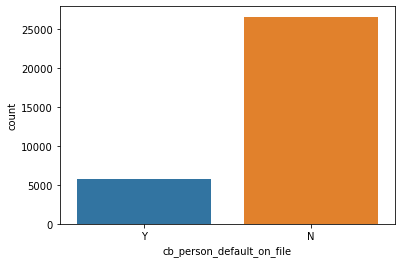

In [48]:
# Visualizando o Padrão histórico dos clientes
# Y = tem um padrão historico e N = não tem um padrão histórico
sns.countplot(x = base_credit['cb_person_default_on_file']);

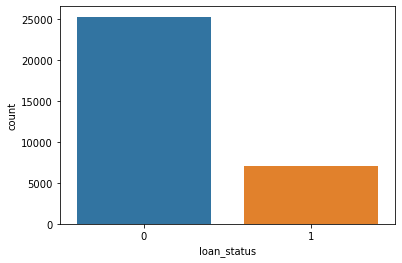

In [49]:
# Visualizando o Status de empréstimo dos clientes
# Onde 0 = não é padrão e 1 = é padrão 
sns.countplot(x = base_credit['loan_status']);

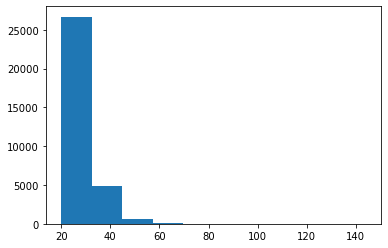

In [50]:
# Idade esta entre os 20 e 30 anos
plt.hist(x = base_credit['person_age'] ); 

In [60]:
# Visualizando a coluna person_home_ownership
base_credit.person_home_ownership.value_counts()

RENT        16328
MORTGAGE    13339
OWN          2562
OTHER         106
Name: person_home_ownership, dtype: int64

In [62]:
# Fazendo a transformação de objeto para numero inteiro da coluna person_home_ownership
# 0 = MORTGAGE (HIPOTECA)
# 1 = OTHER (OUTRO)
# 2 = OWN (TER)
# 3 = RENT (ALUGUEL)
base_credit['person_home_ownership'] = LabelEncoder().fit_transform(base_credit['person_home_ownership'])
base_credit.person_home_ownership.value_counts()

3    16328
0    13339
2     2562
1      106
Name: person_home_ownership, dtype: int64

In [54]:
# Visualizando a coluna loan_intent
base_credit.loan_intent.value_counts()

EDUCATION            6390
MEDICAL              6029
VENTURE              5673
PERSONAL             5481
DEBTCONSOLIDATION    5173
HOMEIMPROVEMENT      3589
Name: loan_intent, dtype: int64

In [59]:
# Fazendo a transformação de objeto para numero inteiro da coluna loan_intent
# 0 = DEBTCONSOLIDATION (CONSOLIDAÇÃO DE DÉBITO)
# 1 = EDUCATION (EDUCAÇÃO)
# 2 = HOMEIMPROVEMEN (MELHORIA DA CASA)
# 3 = MEDICAL (MÉDICO)
# 4 = PERSONAL (PESSOAL)
# 5 = VENTURE (RISCO)
base_credit['loan_intent'] = LabelEncoder().fit_transform(base_credit['loan_intent'])
base_credit.loan_intent.value_counts()

1    6390
3    6029
5    5673
4    5481
0    5173
2    3589
Name: loan_intent, dtype: int64

In [63]:
# Visualizando a coluna loan_intent
base_credit.loan_grade.value_counts()

A    10661
B    10355
C     6432
D     3619
E      963
F      241
G       64
Name: loan_grade, dtype: int64

In [ ]:
# Fazendo a transformação de objeto para numero inteiro da coluna loan_grade
# 0 = DEBTCONSOLIDATION (CONSOLIDAÇÃO DE DÉBITO) 
# 1 = EDUCATION (EDUCAÇÃO)
# 2 = HOMEIMPROVEMEN (MELHORIA DA CASA)
# 3 = MEDICAL (MÉDICO)
# 4 = PERSONAL (PESSOAL)
# 5 = VENTURE (RISCO)
base_credit['loan_grade'] = LabelEncoder().fit_transform(base_credit['loan_grade'])
base_credit.loan_intent.value_counts()

In [ ]:
X_credit = base_credit.iloc[:,]